In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\dokumen\Work\Courses\python\Otodidak\Raw1/survey_results_public.csv', index_col='Respondent') #put your own directory
schema_df = pd.read_csv('D:\dokumen\Work\Courses\python\Otodidak\Raw1/survey_results_schema.csv', index_col='Column') #put your own directory

In [3]:
pd.set_option('display.max_column', 85)
pd.set_option('display.max_row', 85)

In [4]:
df['Age'] = (df['Age'].fillna(0).astype(np.int64))
df['Age'] = df['Age'].replace(0, np.nan)
df['Age'].value_counts()

25.0    4669
24.0    4433
27.0    4418
26.0    4400
28.0    4390
        ... 
9.0        1
91.0       1
85.0       1
97.0       1
90.0       1
Name: Age, Length: 91, dtype: int64

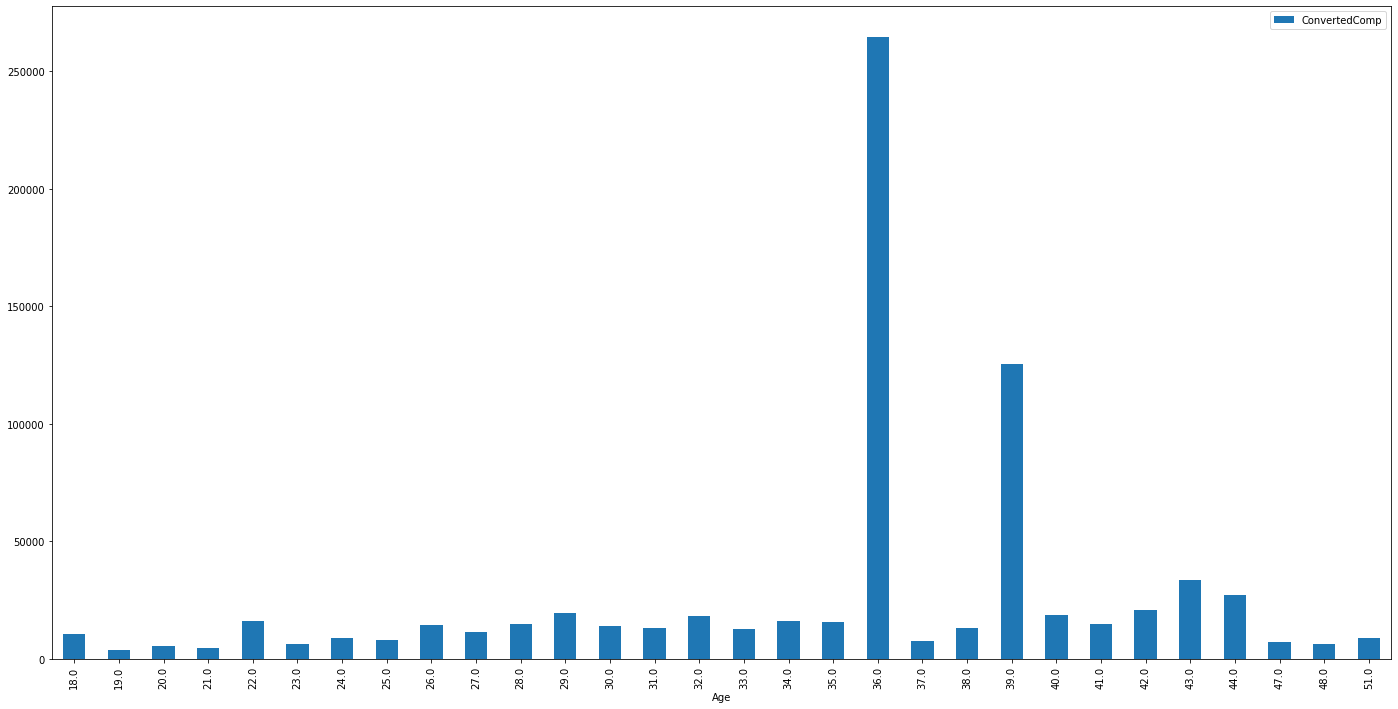

In [5]:
Indonesia = ['Indonesia']
indo = (df['Country'].isin(Indonesia)) & (df['ConvertedComp'] > 0) & ((df['Age'] >0))

sal = df.loc[indo, ['Age', 'ConvertedComp']]
sal1 = sal.groupby('Age').mean()
sal1.plot.bar(figsize = (24,12))

In [6]:
notin = [36.0, 39.0]

sal = sal.loc[~sal.Age.isin(notin)]

sal1 = sal.groupby('Age').mean().reset_index()
#sal1.plot.bar()

In [7]:
avg = sal1['ConvertedComp'].mean()

sal1['avg'] = avg

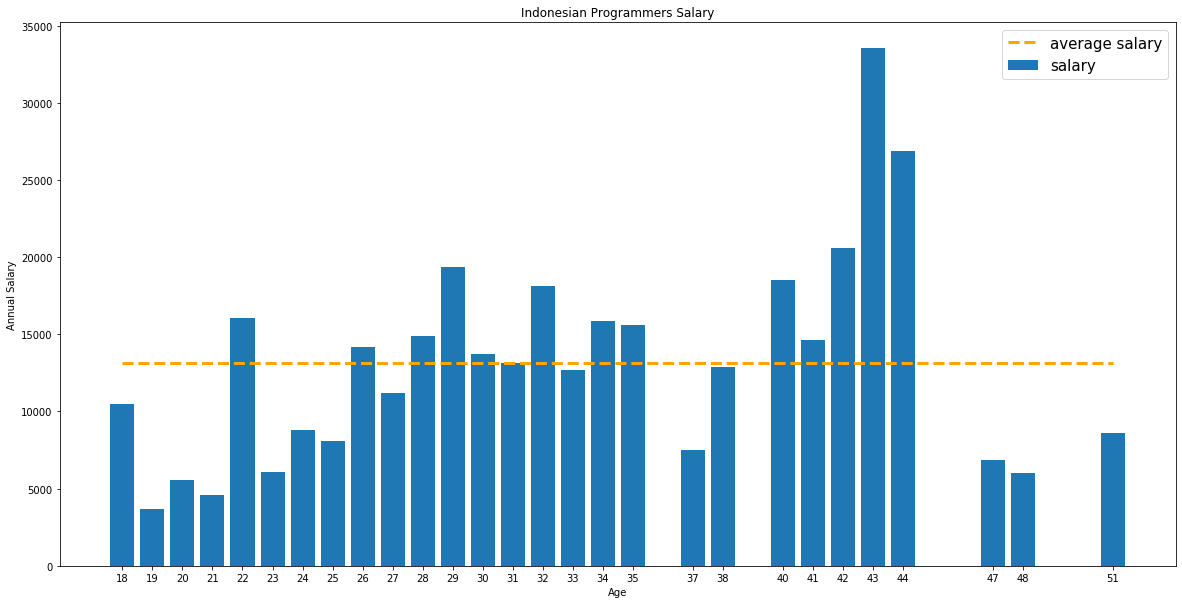

In [8]:
x = sal1['Age']
y1 = sal1['ConvertedComp']
y2 = sal1['avg']
legends = ['average salary', 'salary']

plt.figure(figsize = (20,10))
plt.bar(x, y1)
plt.plot(x, y2, color='orange', linewidth=3, linestyle='--')
plt.xticks(x)
plt.xlabel("Age")
plt.ylabel("Annual Salary")
plt.title("Indonesian Programmers Salary")
plt.legend(legends, loc = 'best', fontsize = 15)

plt.show()

In [9]:
upper = sal1['ConvertedComp'] >= avg
lower = sal1['ConvertedComp'] <= avg

lower = sal1.loc[lower]
upper = sal1.loc[upper]

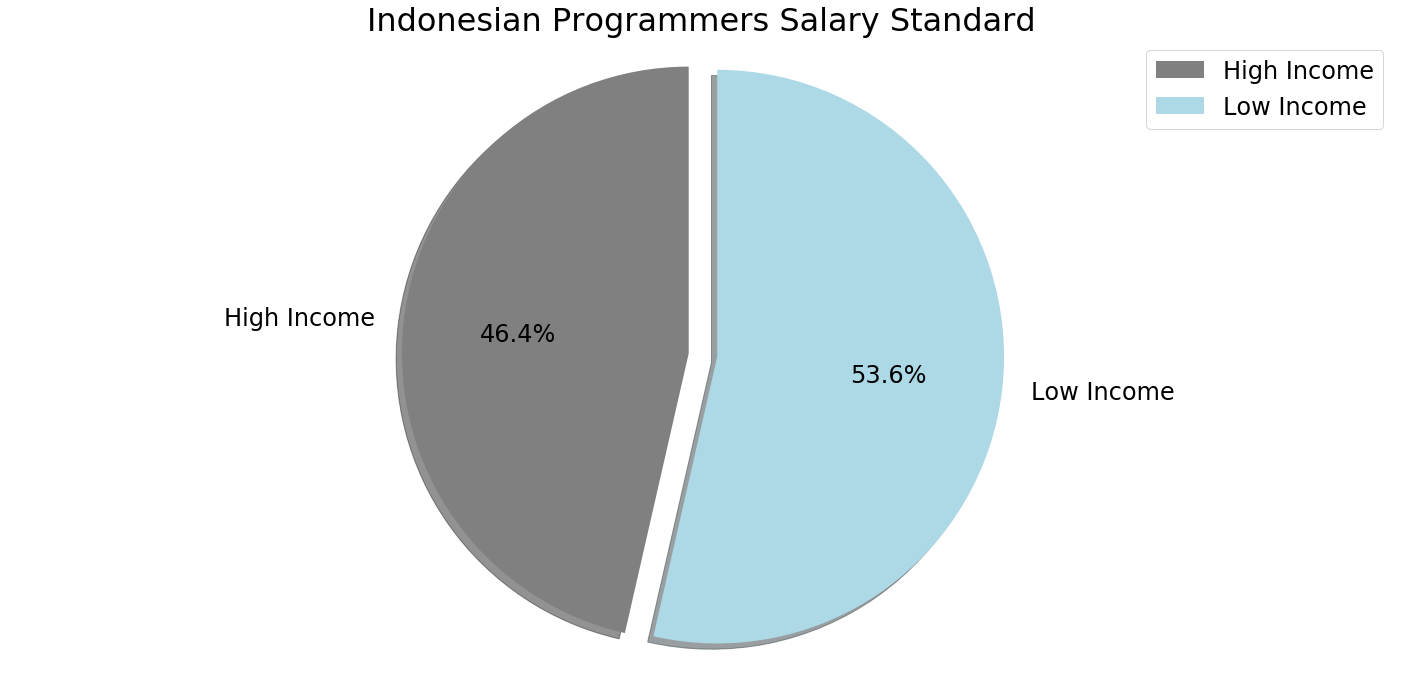

In [10]:
labels = 'High Income', 'Low Income'
sizes = [len(upper), len(lower)]
colors = ['gray', 'LightBlue']
explode = (0.1, 0)  # explode 1st slice

plt.rcParams['text.color'] = 'black'

# Plot
fig, ax1 = plt.subplots(figsize = (20,10)) 
fig.patch.set_facecolor('white')
plt.rcParams['text.color'] = 'black'
plt.rcParams['font.size'] = 24
ax1.pie(sizes, explode = explode, colors=colors, startangle=90, labels=labels, autopct='%1.1f%%', shadow = True) 

plt.axis('equal')
plt.title('Indonesian Programmers Salary Standard', fontsize = 32)
ax1.legend(labels, loc = 'best', fontsize = 24) 
plt.tight_layout() 
plt.show()